<h3> Problem statement </h3>
<p>An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Through this process, some of the leads get converted while most do not. 
The typical lead conversion rate at X education is around 30% </p>
<p>The CEO has set a target lead conversion rate of 80%. The lead scoring model should help the sales team to prioritize potential leads that have a higher conversion chance
and enable them to focus on communicating with them </p>


<h2>Steps to consider</h2>
<ol style="color:DodgerBlue";>
<li>Loading, understanding and visualising the data.</li>
<li>Preparing data for modeling (train-test split, rescalling etc)</li>
<li>Building and training model</li>
<li>Testing the model</li>
</ol>


<h2>Step-1:</h2> <p style="color:DodgerBlue;">Importing important libraries</p>

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)


 <h2>Step-2:</h2> 
    <ul style="color:DodgerBlue;">
    <li>Loading data</li> 
    <li>Reading Data</li>
    <li>Analysing and Inspecting data</li>
    <li>Cleaning/Imputing Data </li>
    </ul>
    

In [3]:
# Read the data
df = pd.read_csv('Leads.csv')
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [4]:
df.shape


(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<h4> <mark>checking unique column using chart and values</mark></h4>

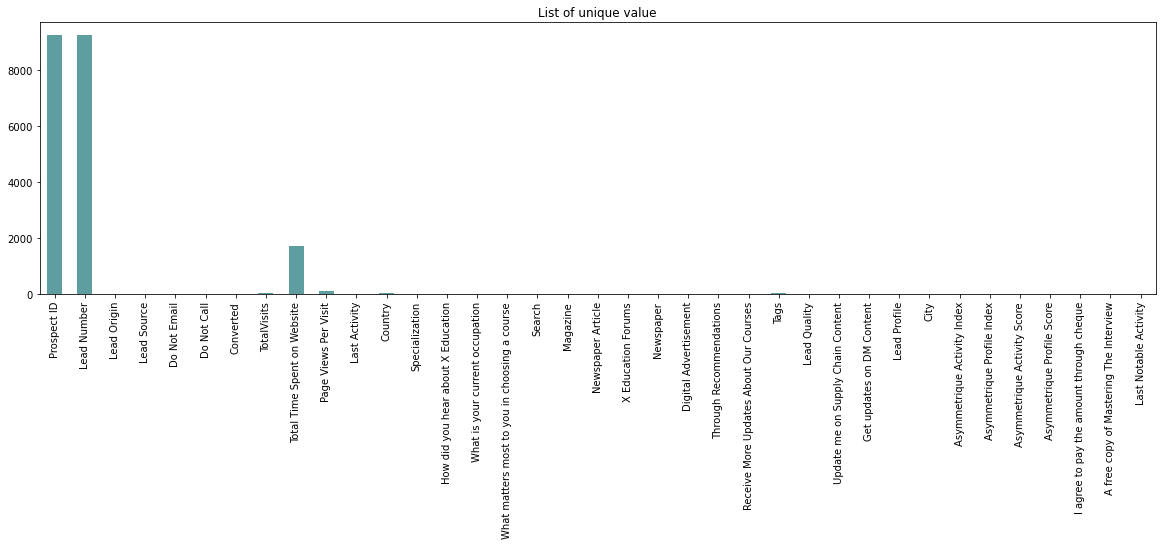

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
unique_column=df.nunique()
plt.figure(figsize=(20,5))
unique_column.plot(kind='bar', color="#5F9EA0")
plt.title('List of unique value')
plt.show()
print(unique_column)

In [9]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


<h3>Following columns have only one unique value:</h3>
<p>
<ol>
<li >I agree to pay the amount through cheque</li>
<li>Get updates on DM Content</li>
<li>Update me on Supply Chain Content</li>
<li>Receive More Updates About Our Courses</li>
<li>Magazine</li>
</ol>
<mark>These columns have only one category of response and can be dropped</mark>
 </p>

<h4>Dropping columns which are of no use for modeling</h4>

In [10]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df.shape)
df.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 37)
After Dropping Columns (9240, 32)


In [11]:
# Finding the columns having "Select" values
column_select=[]
for cols in df.columns:
    if 'Select' in list(df[cols]):
           column_select+= [cols]
print(column_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
df = df.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
column_select=[]
for cols in df.columns:
    if 'Select' in list(df[cols]):
           column_select+= [cols]
print(column_select)

[]


<h4><mark>Checking null % for each column using chart and values </mark></h4>

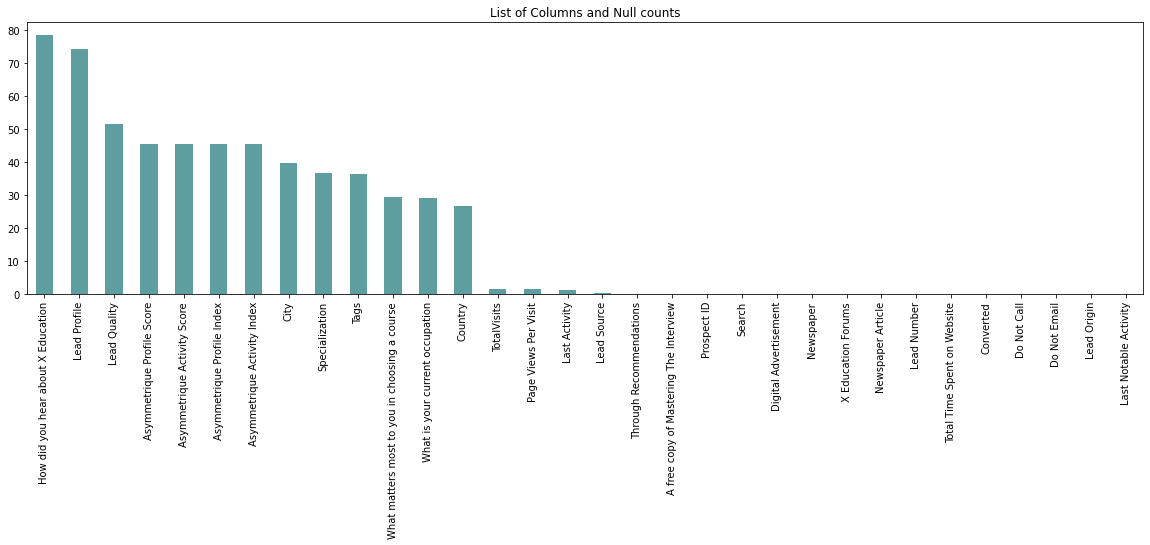

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
null_colmn=100*(df.isna().mean()).sort_values(ascending=False)
plt.figure(figsize=(20,5))
null_colmn.plot(kind='bar', color="#5F9EA0")
plt.title('List of Columns and Null counts')
plt.show()
print(null_colmn)

<h2 > Inference:</h2>
<p>From above bar chart we can see columns having 40% null values:
<ul>
<li>How did you hear about X Education</li>
<li>Lead Quality</li>
<li>Lead Profile</li>
<li>Asymmetrique Activity Index</li>
<li>Asymmetrique Profile Index</li>
<li>Asymmetrique Activity Score</li>
<li>Asymmetrique Profile Score</li>
</ul>
<mark>Dropping above columns as having % greater than 40%</mark>
</p>

In [15]:
#Dropping all columns having a missing value percentage greater than 40%.
df = df.drop(df.loc[:, list((round(df.isnull().sum()/len(df)*100, 2)>=40))].columns, 1)

In [16]:
print("Columns remaining after dropping \n", df.columns)

Columns remaining after dropping 
 Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [17]:
# Check % of null values for remaining columns

100*(df.isna().mean()).sort_values(ascending=False)


City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Prospect ID                                       0.0000

<h4>Checking null values of columns having categorical values</h4>

In [18]:
columnsList= ['City', 'Specialization', 'Tags', 'What matters most to you in choosing a course',
              'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

for i in columnsList:
        perc = round(df[i].value_counts(normalize=True)*100, 2)
        print("value_counts % for :", i.upper(), ":\n")
        print(perc, "\n")
        
        print("==="*40, "\n")

value_counts % for : CITY :

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64 


value_counts % for : SPECIALIZATION :

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness             

<h3>Inference:</h3>
<ol>
<li><b>City</b>: 39.71% missing values. <mark>Hence City column can be dropped.</mark> </li>
<li><b>Specialization</b>: 36.58% missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. Creating additional category called 'Others' is better option.</li>
<li><b>Tags</b>: 36.29% missing values. Tags are assigned to customers indicating the current status of the lead. <mark>Hence it can be dropped</mark>.</li>
<li><b>What matters most to you in choosing a course</b>: 29.32% missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight. <mark>Hence, we can drop this column</mark>.</li>
<li><b>What is your current occupation</b>: 29.11% missing values. We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context</li>
<li><b>Country</b>: X Education sells online courses and appx 96% of the customers are from India. This is massively skewed and will not provide any insight. <mark>Hence, we can drop this column</mark>.</li>
<li><b>Last Activity</b>: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.</li>
<li><b>Lead Source</b>: "Google" is having highest number of occurences, hence we will impute the missing values with label 'Google'</li>
<ol>

In [19]:
print("Before Dropping the columns",df.shape)
df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Dropping the columns",df.shape)

Before Dropping the columns (9240, 25)
After Dropping the columns (9240, 21)


In [20]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df=df.fillna(value=missing_values)


In [21]:
# Re Checking the percentage of null values for remaining columns
nullseries =  round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending = False)
print(nullseries)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Search                                    0.00
Last Activity                             0.00
Specialization                            0.00
Lead Number                               0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Source                               0.00
Lead Origin                               0.00
Last Notable Activity                     0.00
dtype: float6

<h4>Checking null values of columns having numerical values</h4>

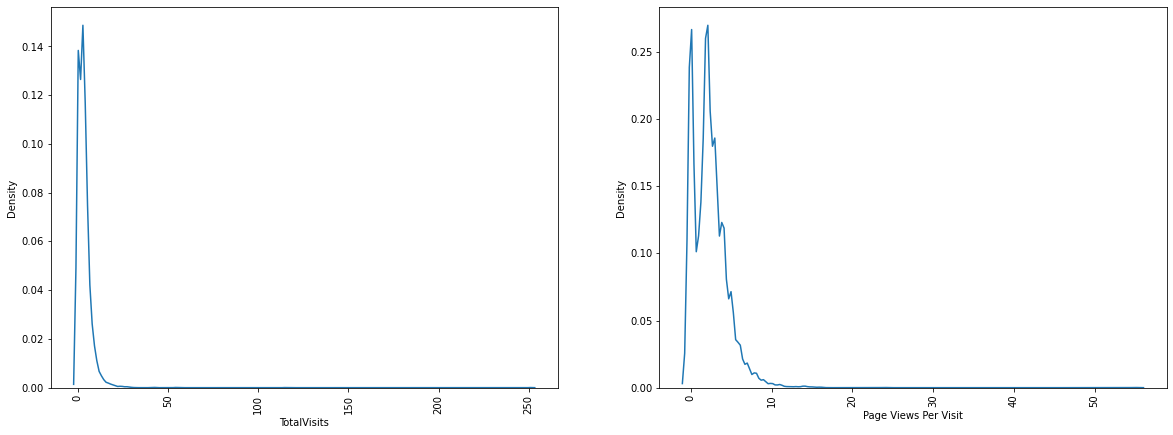

In [22]:
# Only 'TotalVisits' and'Page Views Per Visit' columns have null values

columnsList = ['TotalVisits', 'Page Views Per Visit']
       
plt.figure(figsize = (20,7))
for i in enumerate(columnsList):
    plt.subplot(1,2, i[0]+1)
    ax = sns.distplot(df[i[1]], hist =False)
    plt.xticks(rotation=90)
    
plt.show()

In [23]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [24]:
# TotalVisits missing values to be imputed with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [25]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                               0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Last Activity                             0.0
Lead Number                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Last Notable Activity                     0.0
dtype: float64

In [26]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df.TotalVisits.value_counts().head(10)


Page Views Per Visit - Value Counts
----------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [27]:
# Dropping Columns
print("Before Dropping Columns",df.shape)
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [28]:
100*(df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

<h4>Checking for columns having highly skewed and dropping them</h4>

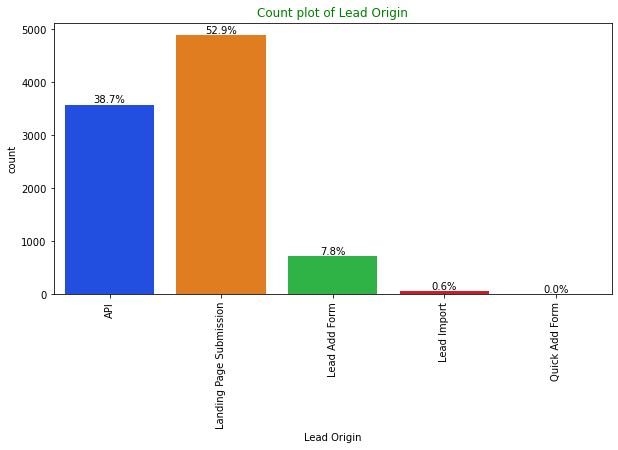

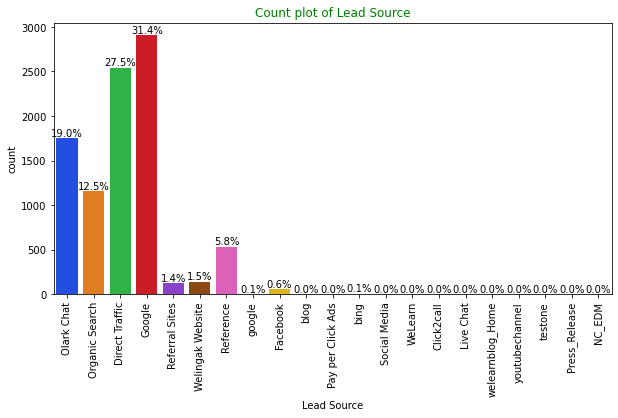

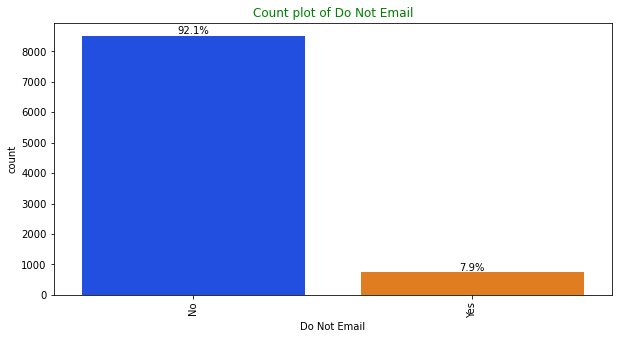

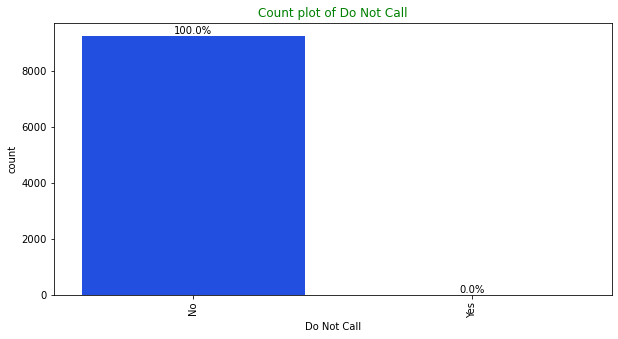

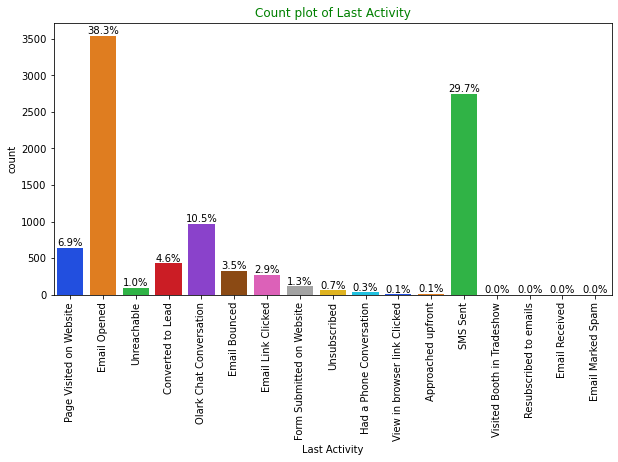

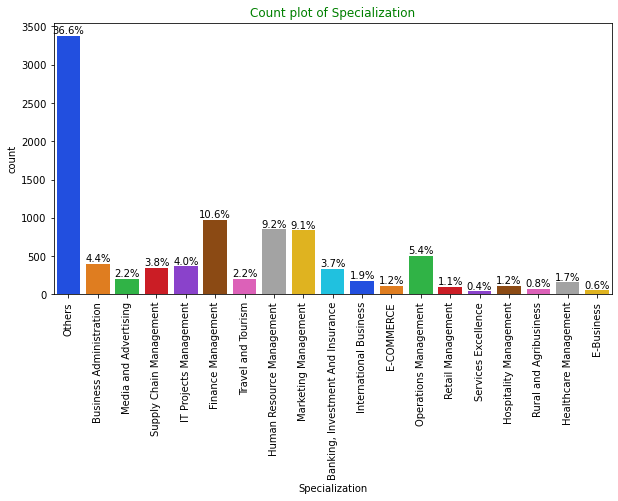

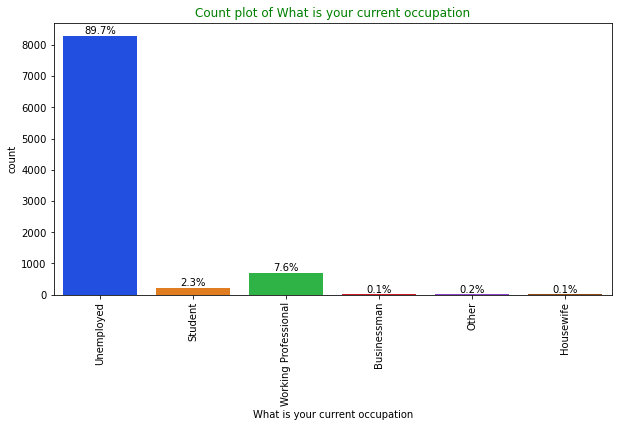

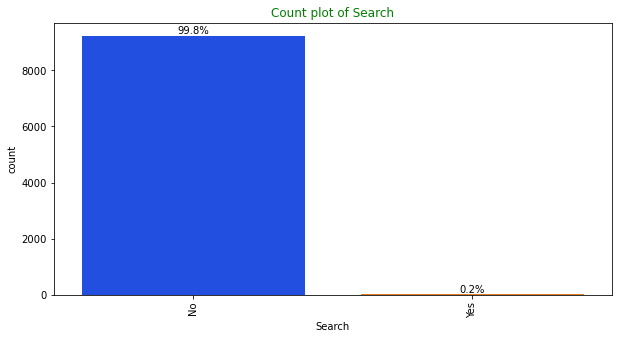

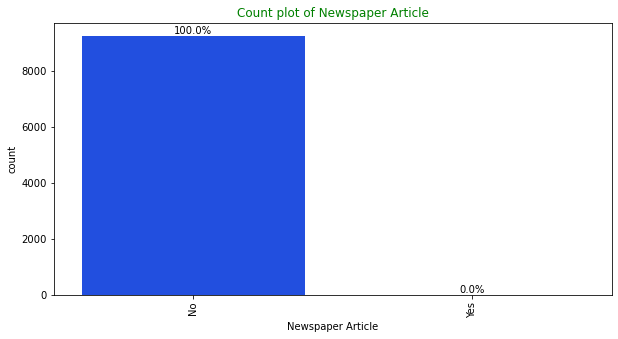

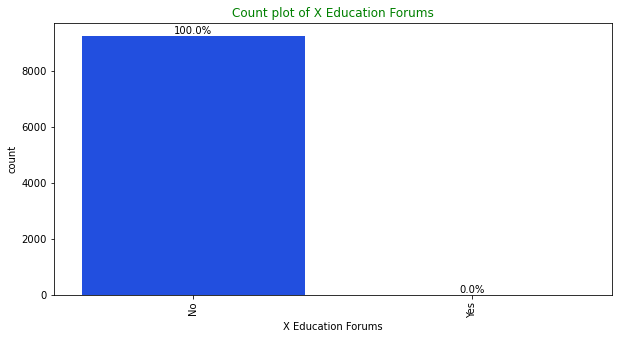

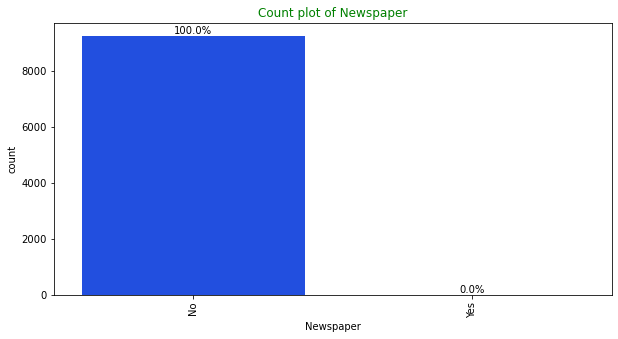

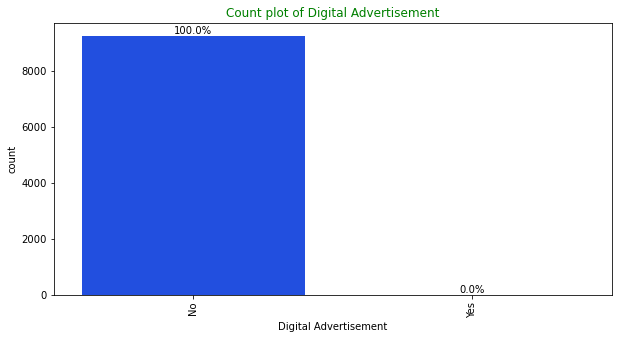

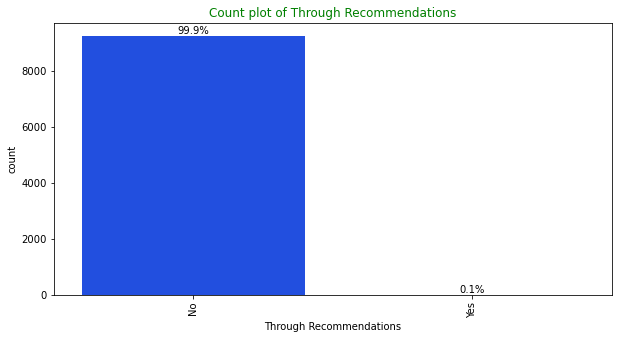

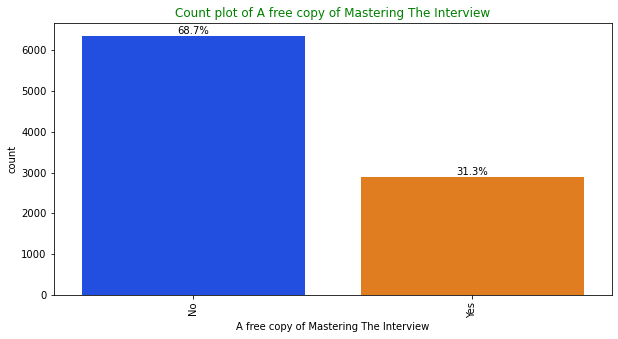

In [29]:
# plotting countplot for object dtype and histogram for number to get data distribution
columnsList = df.select_dtypes(include=['category', 'object']).columns.tolist()

for i in columnsList[:]:
    plt.figure(figsize = [10,5])
    plt.title("Count plot of {}".format(i),color='green')
    ax = sns.countplot(x=i, data=df, palette='bright')
    total = len(df[i])
    plt.xticks(rotation=90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
plt.show()

<h3>From above we see that following columns have data highly skewed :</h3>
<ol>
<li >Do Not Call</li>
<li>Search</li>
<li>Newspaper Article</li>
<li>X Education Forums</li>
<li>Newspaper</li>
<li>Digital Advertisement</li>
<li>Through Recommendations</li>
</ol>
<mark>These columns will be dropped as data highly skewed</mark>

In [30]:
print("Before Drop: ",df.shape)
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [31]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes


<h4>Outlier Analysis</h4>

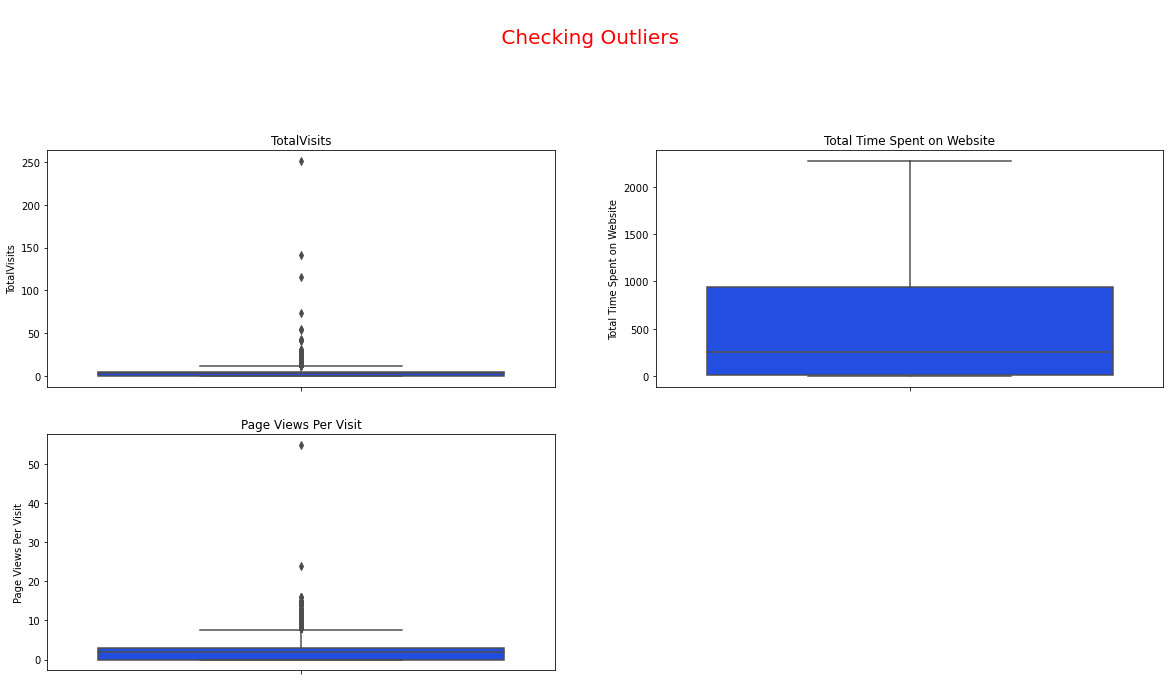

In [32]:
columnsList = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (20, 20))
for col in enumerate(columnsList):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    plt.suptitle("\n Checking Outliers",fontsize=20,color="Red")
    ax = sns.boxplot(y=col[1], data = df, palette='bright')
    
    
plt.show()

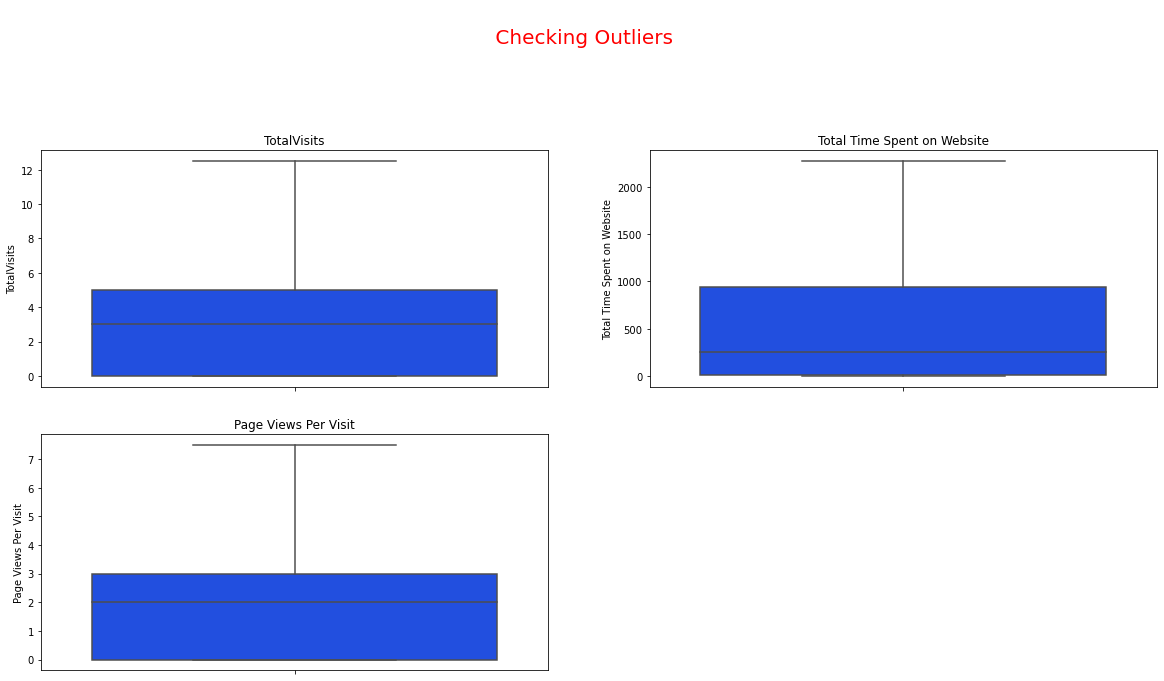

In [33]:
columnsList = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in columnsList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        
        # Capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        # Flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

# Checking outliers after treating
plt.figure(figsize = (20, 20))
for col in enumerate(columnsList):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    plt.suptitle("\n Checking Outliers",fontsize=20,color="Red")
    ax = sns.boxplot(y=col[1], data = df, palette='bright')

plt.show()


In [34]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,No


<h4>Data Standardization</h4>

In [35]:
#Checking uniqueness in all categorical variables
df['Lead Source'].value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

<h4> from above we can see it will be time consuming to write code for each column,lets optimise code by using loop </h4>

In [36]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_ _"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _ 

value_counts % for : Do Not Email 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 

_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _ 

value_counts % for : Last Activity 

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable       

In [37]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [38]:
# value_counts percentage after replace
df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [39]:
# Grouping low frequency value levels to Others 
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [40]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [41]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [42]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes


In [43]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['Free_copy'] = df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [44]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   float64
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 794.2+ KB


<h2>Step 3: Exploratory Data Analysis</h2>
<ol style="color:DodgerBlue;">
<li >Univariate Analysis of Categorical Variables</li>
<li>Bivariate Analysis of Categorical Variables</li>
<li>Bivariate Analysis of Numerical Variables</li>
</ol>

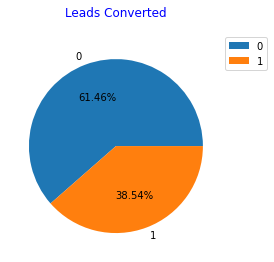

In [46]:
## ploting the results on bar plot

df2 = df["Converted"].value_counts()
plt.title("Leads Converted\n ",color="blue")
plt.pie(df2, labels=df2.index,autopct="%.2f%%");
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)



<h4>Checked whether Data is Imbalanced or not</h4>
<ul>
<li>Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution</li>
<li>Data imbalance is in the context of Target variable only</li>
<li>Target variable is 'Converted' which tells whether a past lead was converted or not <mark>wherein 1 means it was converted and 0 means it wasn’t converted</mark> </li>
</p>

In [47]:
ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


<h4>Univariate Analysis for Categorical Variables</h4>

In [48]:
cat_cols = ["Lead Origin","Current_occupation","Lead Source","Last Activity","Specialization"]

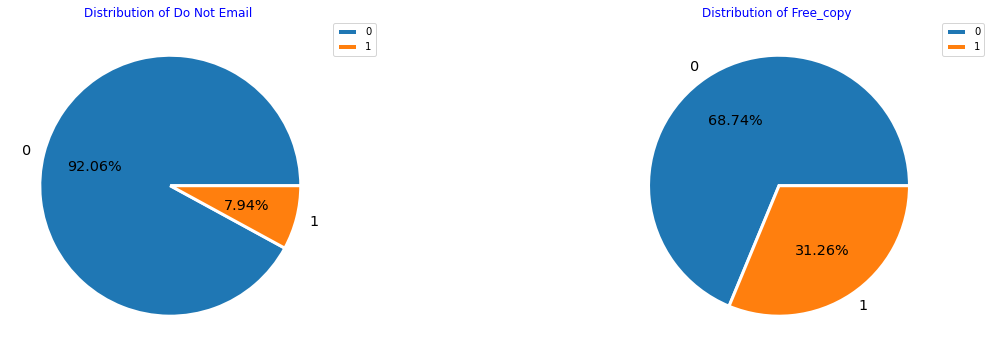

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
df1 = df["Do Not Email"].value_counts()
plt.title("Distribution of Do Not Email ",color="blue")
plt.pie(df1, labels=df1.index,autopct="%.2f%%", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'});
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.subplot(1,2,2)
plt.title("Distribution of Free_copy ",color="blue")
df2 = df["Free_copy"].value_counts()
plt.pie(df2, labels=df2.index,autopct="%.2f%%", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'});
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

<mark>** plotting for next variable using snsplot as piechart looks clumpsy when it has more values ** </mark>

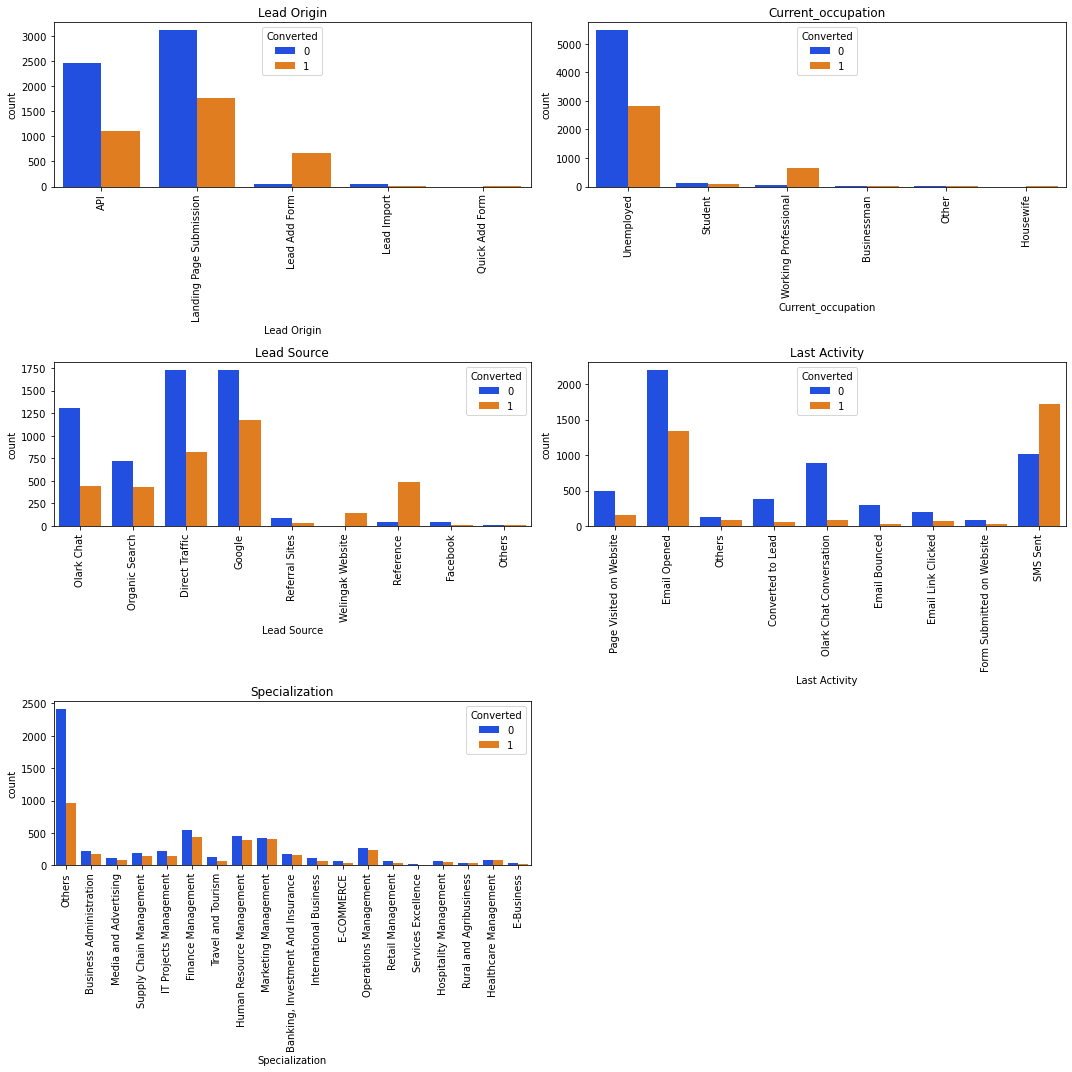

In [50]:
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(cat_cols):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = df, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

<h3>Inference drawn from Univariate Analysis for Categorical Variables:</h3>
<ol>
<li><b>Lead Origin:</b> The majority of customers, <mark>52.9%</mark>, were identified through 'Landing Page Submission' as the lead origin.</li>
<li><b>Current_occupation:</b>  A significant proportion of customers, <mark>89.7%</mark>, are unemployed based on the current occupation information.</li>
<li><b>Do Not Email:</b>  A large proportion of customers, <mark>92.1%</mark>, do not want to receive emails about the course.</li>
<li><b>Lead Source:</b>  The primary lead source is Google at <mark>31.5%</mark>.</li>
<li><b>Last Activity:</b>  Email is the most common last activity, with <mark>38.3%</mark> of customers having opened an email, and 29.7% having sent an SMS.</li>
<li><b>Specialization:</b>  The 'Others' specialization category is the most common among customers at <mark>36.6%</mark>,</li>
</ol>


<h4>Bivariate Analysis</h4>

In [51]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="prism_r",alpha=0.46)
    
    
    total=len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


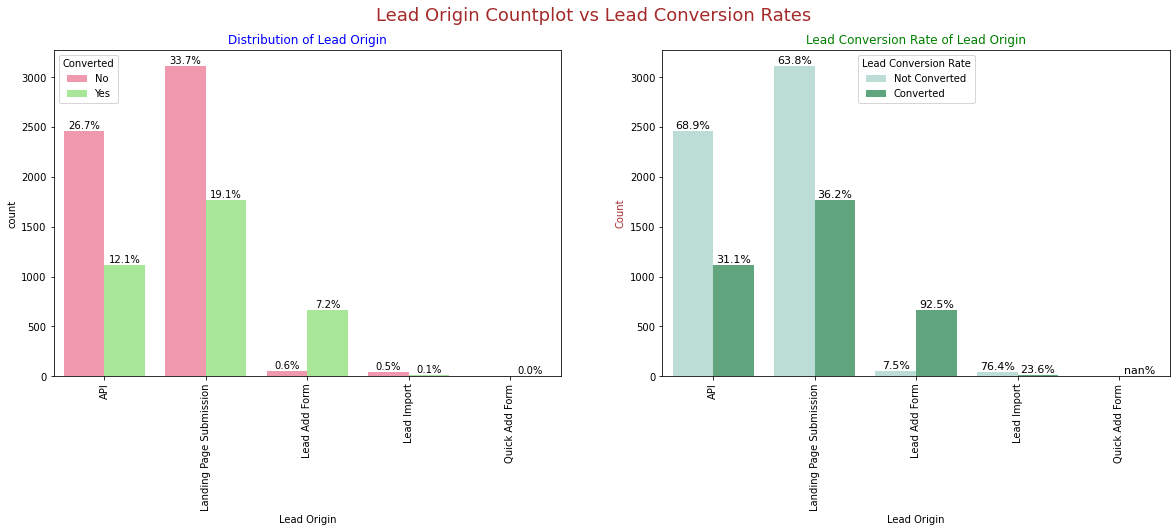

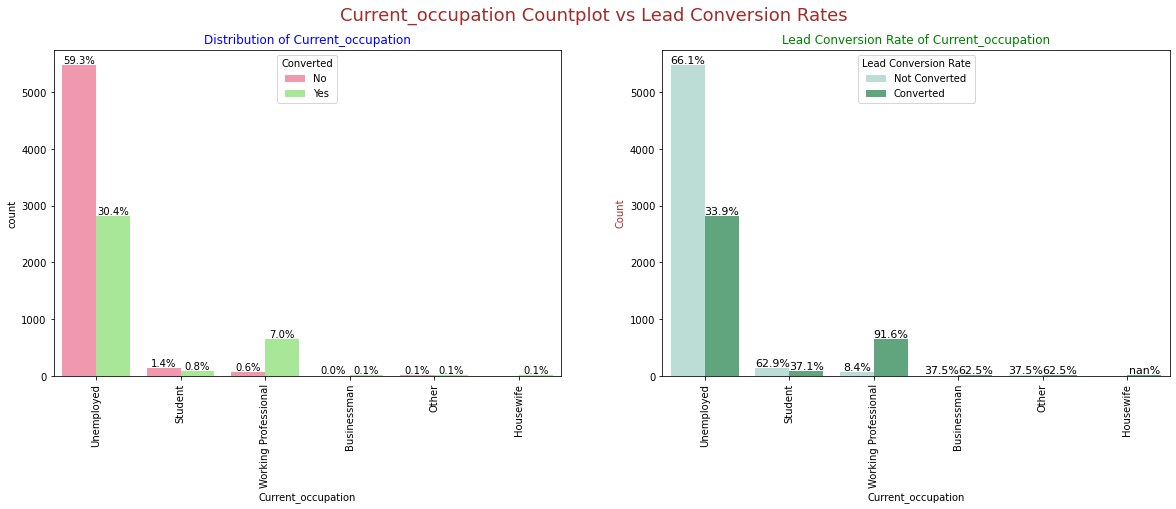

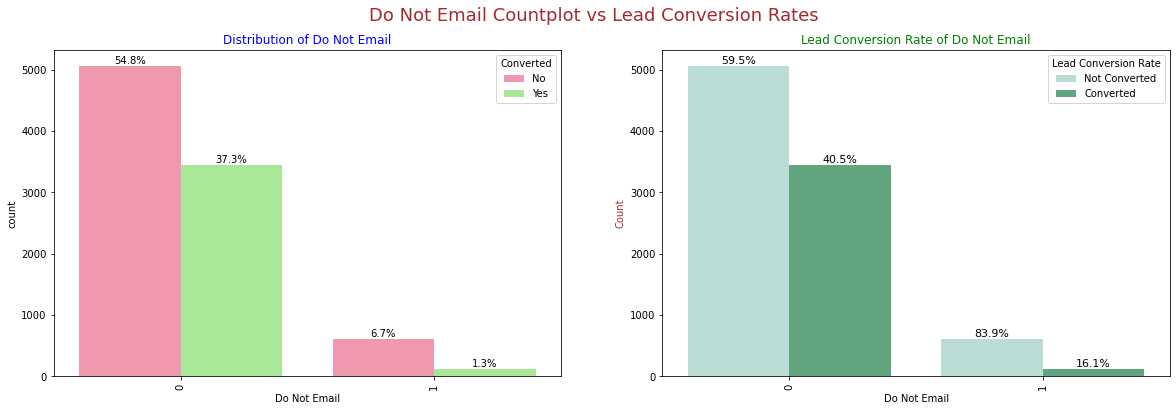

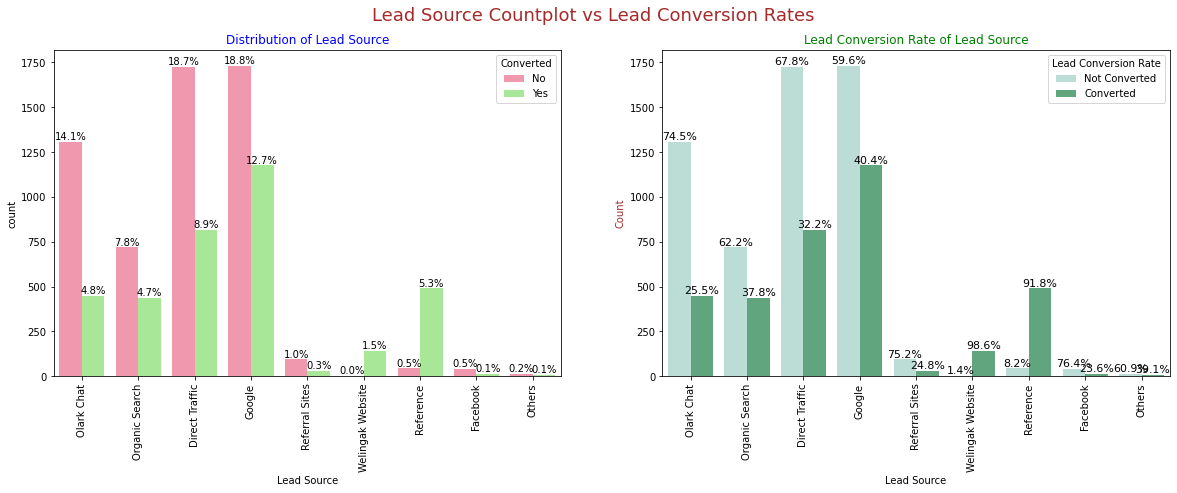

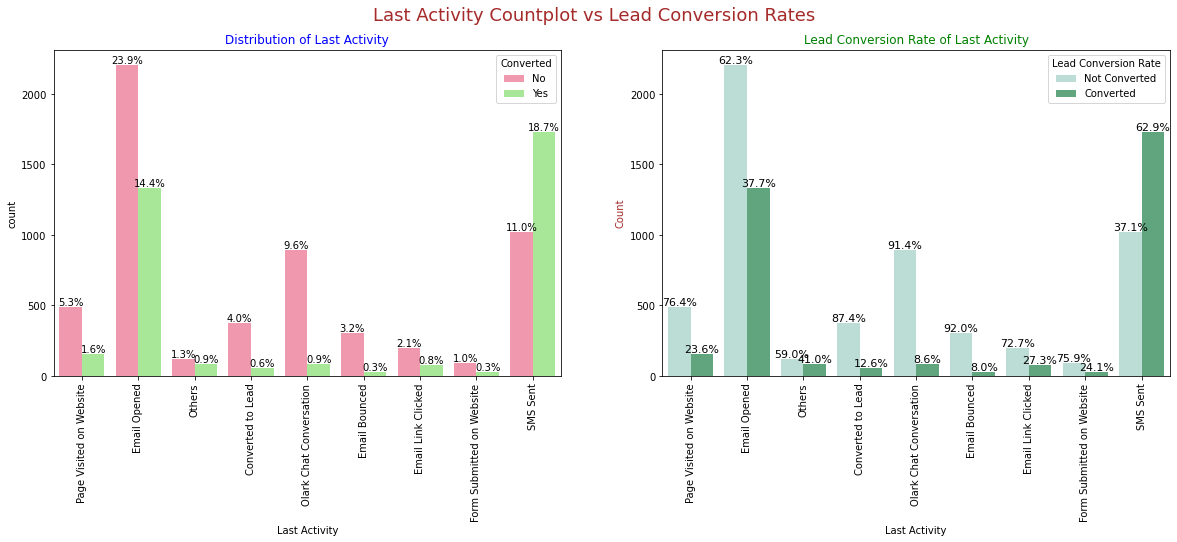

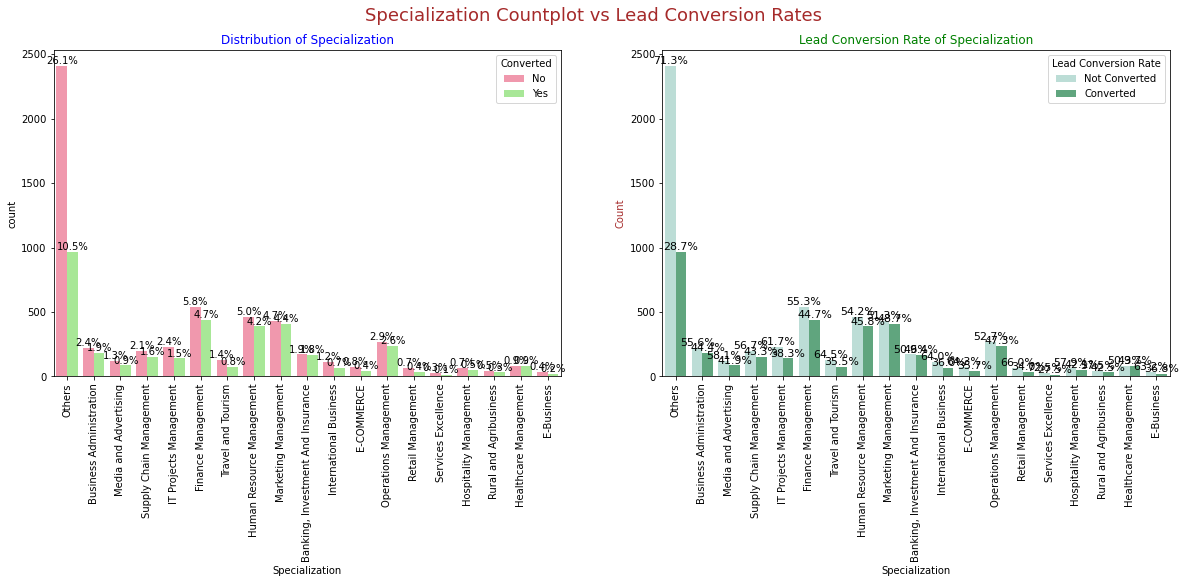

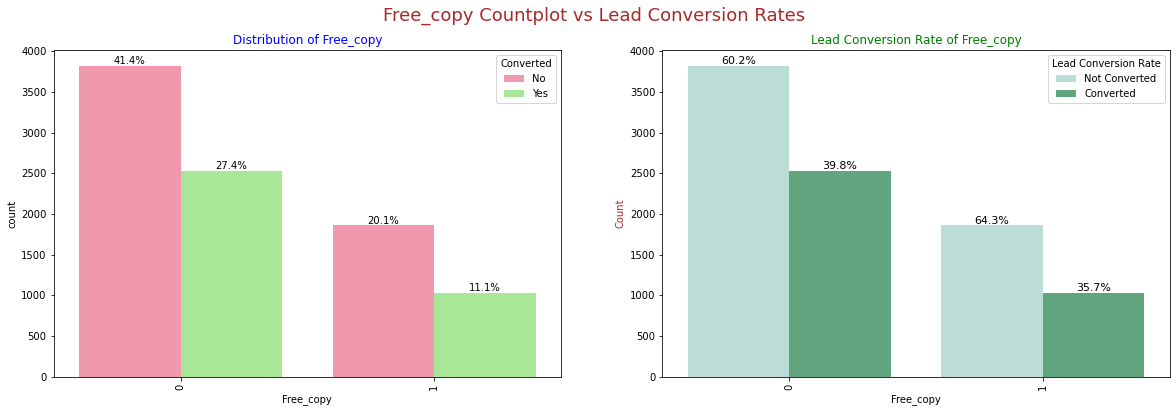

In [52]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df,variable_name=i)

<h3>Inference drawn from Bivariate Analysis for Categorical Variables:</h3>
<ol>
<li><b>Lead Origin:</b> 'Landing Page Submission' is the most effective Lead Origin with a Lead Conversion Rate (LCR) of <mark>36.2%</mark> </li>
<li><b>Current_Occupation:</b> Working Professionals have a significantly higher LCR at <mark>91.6%</mark> compared to Unemployed people at 33.9%.</li>
<li><b>Lead Source:</b> Google is the most effective Lead Source with an LCR of <mark>40.4%</mark> </li>
<li><b>Last Activity:</b>SMS Sent and Email Opened are the most effective Last Activity types with LCRs of <mark>62.9%</mark> and 37.7% respectively.</li>
<li><b>Specialization:</b> Marketing Management, HR Management, Finance Management and Operations Management all show good LCRs, indicating a strong interest among customers in these specializations.</li>

<h4>Bivariate Analysis of Numerical Variables</h4>

In [53]:
NumCols = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']


<Figure size 1152x288 with 0 Axes>

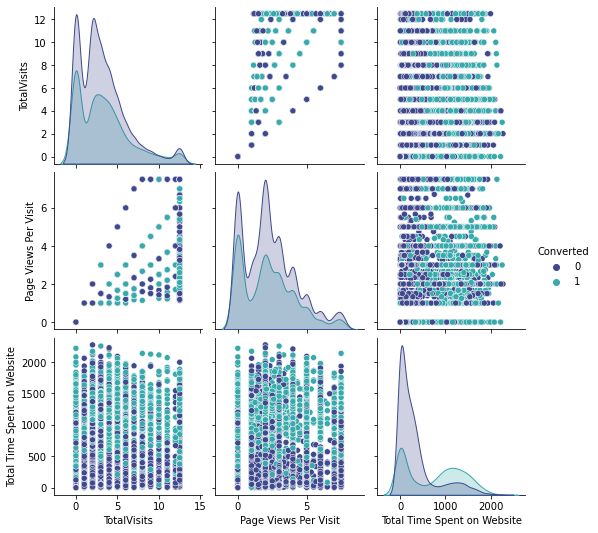

In [54]:
# Pairplot of Numerical Variables
plt.figure(figsize = (16, 4))
sns.pairplot(data=df, vars=NumCols[1:], hue="Converted", palette="mako")                                  
plt.show()

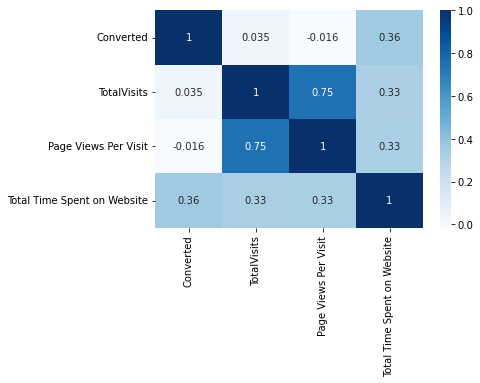

In [55]:
sns.heatmap(data=df[NumCols].corr(),cmap="Blues",annot=True)
plt.show()

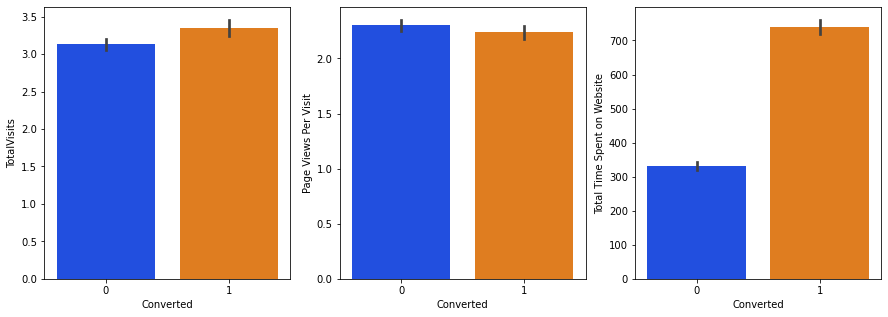

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

<h2>Step- 4: Data Preparation</h2>
<ol style="color:DodgerBlue";>
<li>Create dummy variables for all categorical variables</li>
<li>Splitting the Data into Training and Testing Sets</li>
</ol>

In [57]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0


In [58]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                 'Current_occupation']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [59]:
# We have created dummies for the below variables, so we can drop them

df = df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)


In [60]:
df.shape

(9240, 49)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   float64
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

In [62]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df['Converted']


In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (6468, 48) 
y_train: (6468,)
X_test: (2772, 48) 
y_test: (2772,)


<h2>Step- 5: Feature Scaling and Correlation Checking </h2>

In [64]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

# Fetching int64 and float64 dtype columns from dataframe for scaling
NumVarCols = X_train.select_dtypes(include=['int64','float64']).columns

X_train[NumVarCols] = scaler.fit_transform(X_train[NumVarCols])

# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [65]:
# Checking the Lead Conversion Rate (LCR) for 'Converted' Target Variable

LCR = round((sum(df['Converted'])/len(df['Converted'].index))*100, 2)
print('Lead Conversion Rate(LCR) =', LCR)

Lead Conversion Rate(LCR) = 38.54


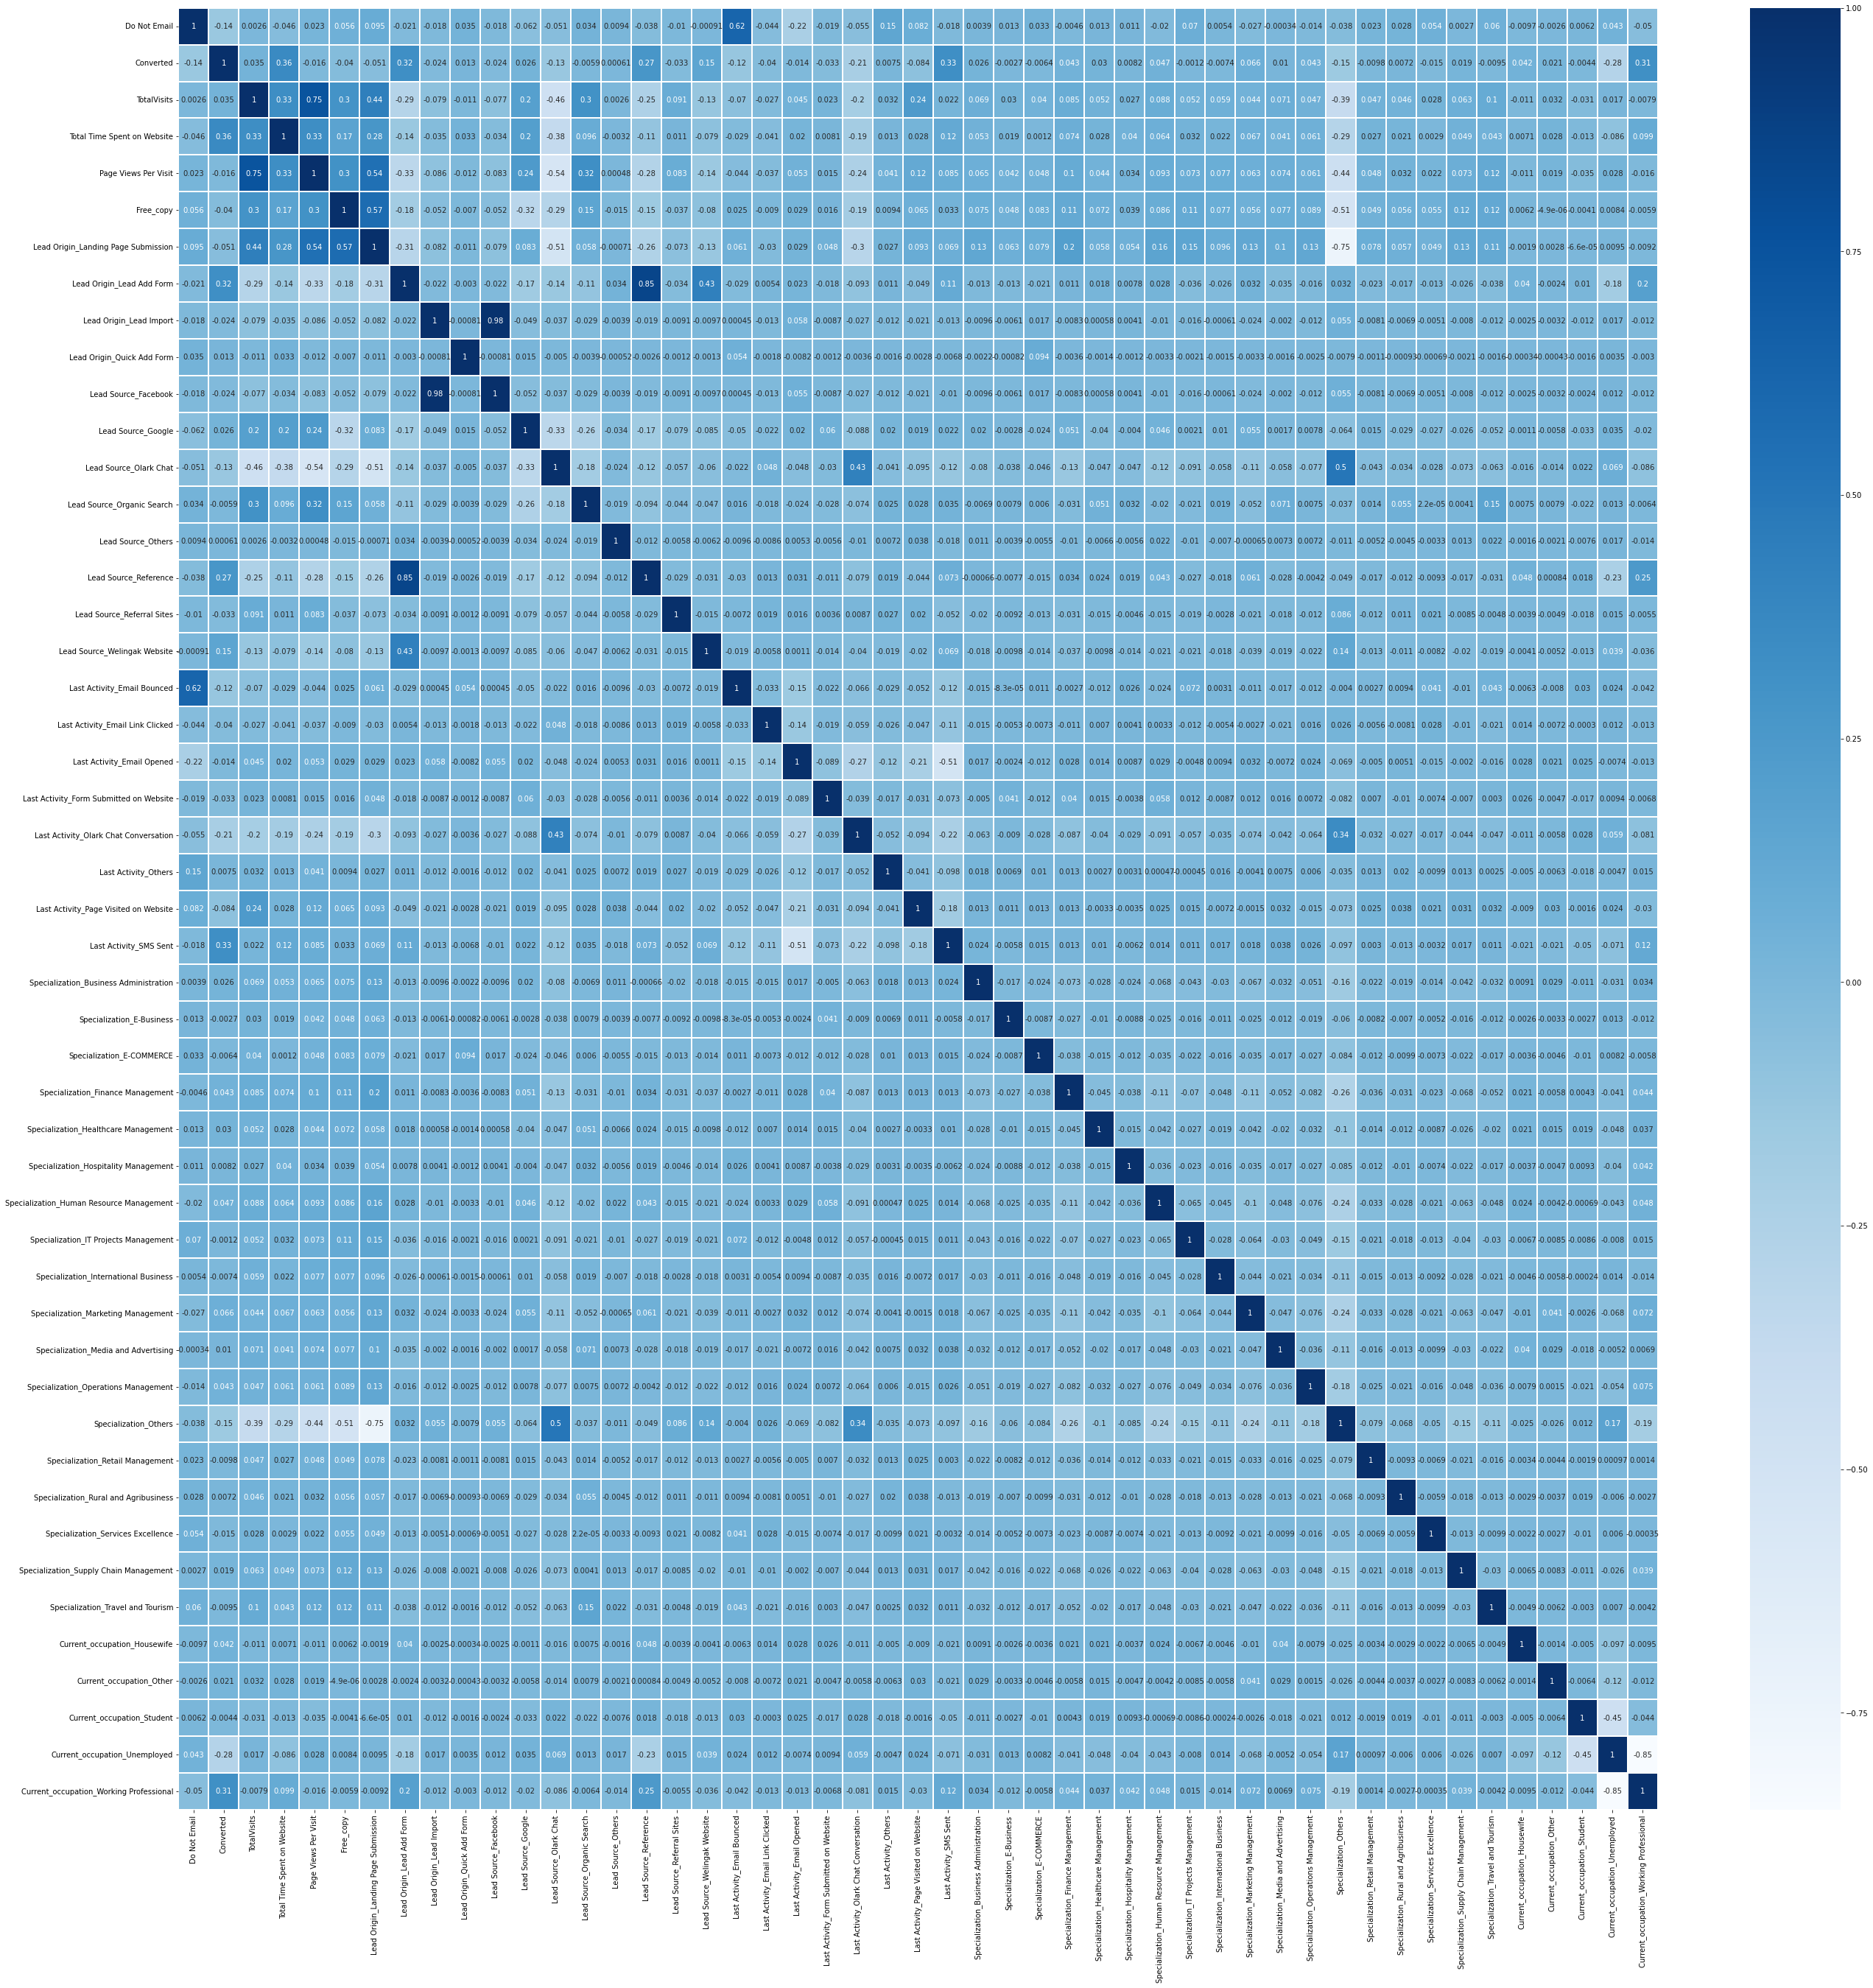

In [66]:
# analyse correlation matrix
plt.figure(figsize = (45,45))        
sns.heatmap(df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

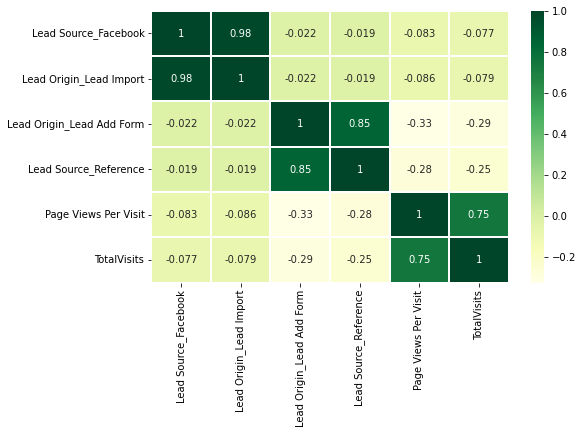

In [67]:
# Breaking down suspected variables which migh have high correlation with each other

plt.figure(figsize = (8,5))        
sns.heatmap(df[['Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form', 'Lead Source_Reference',
                       'Page Views Per Visit', 'TotalVisits']].corr(), linewidths=0.01, cmap="YlGn", annot=True)
plt.show

In [68]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

<h2>Step- 6: Model Building</h2>

In [69]:
logreg = LogisticRegression()

# running RFE with 13 variables as output
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_))

[('Do Not Email', False),
 ('TotalVisits', False),
 ('Total Time Spent on Website', True),
 ('Page Views Per Visit', False),
 ('Free_copy', False),
 ('Lead Origin_Landing Page Submission', True),
 ('Lead Origin_Quick Add Form', False),
 ('Lead Source_Facebook', True),
 ('Lead Source_Google', False),
 ('Lead Source_Olark Chat', True),
 ('Lead Source_Organic Search', False),
 ('Lead Source_Others', True),
 ('Lead Source_Reference', True),
 ('Lead Source_Referral Sites', False),
 ('Lead Source_Welingak Website', True),
 ('Last Activity_Email Bounced', False),
 ('Last Activity_Email Link Clicked', False),
 ('Last Activity_Email Opened', True),
 ('Last Activity_Form Submitted on Website', False),
 ('Last Activity_Olark Chat Conversation', True),
 ('Last Activity_Others', True),
 ('Last Activity_Page Visited on Website', False),
 ('Last Activity_SMS Sent', True),
 ('Specialization_Business Administration', False),
 ('Specialization_E-Business', False),
 ('Specialization_E-COMMERCE', False),


In [70]:
RFETable=pd.DataFrame()
RFETable['Variable Name']=X_train.columns
RFETable['Variable Chosen'] = rfe.support_
RFETable['Ranking']=rfe.ranking_
RFETable.sort_values(by='Ranking')

,Variable Name,Variable Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


<h2>Logistic Regression Model - I </h2> <br>
<mark>Acceptable threshold <b >(p-values < 0.05)</mark>


In [71]:
# Columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [72]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 18 Apr 2023   Deviance:                       5465.5
Time:                        13:32:05   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

<h4>Removing 'Current_Occupation_Housewife' column from the model as it has higher p-value (0.99)</h4>

In [73]:
# Dropping 'Current_Occupation_Housewife' column
rfe_col=rfe_col.drop('Current_occupation_Housewife')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Working Professional'],
      dtype='object')

<h2>Logistic Regression Model - II </h2><br>
<mark>Acceptable threshold (p-values < 0.05)</mark>

In [74]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 18 Apr 2023   Deviance:                       5480.7
Time:                        13:32:05   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

<h4>Removing 'Lead Source_Facebook' column from the model as it has higher p-value (0.187) </h4>

In [75]:
# Dropping ''Lead Source_Facebook column
rfe_col=rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Working Professional'],
      dtype='object')

<h2> Logistic Regression Model - III </h2>

In [76]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 18 Apr 2023   Deviance:                       5482.6
Time:                        13:32:05   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

<h4>Removing 'Lead Source_Others' column from the model as it has higher p-value (0.055)</h4>

In [77]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop('Lead Source_Others')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Working Professional'],
      dtype='object')

<h2>Logistic Regression Model - IV</h2>

In [78]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 18 Apr 2023   Deviance:                       5486.1
Time:                        13:32:05   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark Chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak Website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_Others                      -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

<h4>The Logistic Regression <mark>Model - 4 is stable and all the p-values are within the acceptable threshold (p-values < 0.05)</mark>, thus making it suitable for further analysis.</h4>

In [79]:
def Vif_Calculator(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model - 4
Vif_Calculator(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


<h2>Step- 7: Model Evaluation</h2>
<ol style="color:DodgerBlue";>
<li>Predicting on the Train set </li>
<li>Confusion Matrix </li>
<li>Plotting the ROC Curve </li>
<li>Finding Optimal Cutoff Point </li>
<li>Calculating all metrics using confusion matrix for Train </li>
<li>Precision and Recall </li>
</ol>

In [80]:
# Getting the predicted values on the train set
y_train_pred = LRMod4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [81]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [82]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


In [83]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


In [84]:
# User defined function for Confusion Matrix
def Confusion_Matrix_Func(confusion_matrix):
    TP = confusion_matrix[1,1] # true positive
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    
    acc = round((TN+TP) / float(TN+TP+FN+FP), 4)  #accuracy
    sens = round(TP / float(TP+FN), 4)            #sensitivity
    spec = round(TN / float(TN+FP), 4)            #specificity
    fprate = round(FP/ float(TN+FP), 4)
    prec = round(TP / float(TP+FP), 4)
    recal = round(TP / float(TP+FN), 4)
    npval = round(TN / float(TN+ FN), 4)
    
    print('Accuracy                  =', acc)
    print('Sensitivity               =', sens)
    print('Specificity               =', spec)
    print('False Positive Rate       =', fprate)
    print('Precision                 =', prec)
    print('Recall                    =', recal)
    print('Negative Predictive Value =', npval)

In [85]:
# Confusion matrix  (Actual / predicted)

confusion_1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion_1)

[[3588  414]
 [ 846 1620]]


|  Actual/Predicted     |  not_converted  | converted     |
| :---                  |    :----:       |          ---: |
| not_converted         | 3588            | 414           |
| converted             | T846            | 1620          |            
                         
                            

In [86]:
Confusion_Matrix_Func(confusion_1)

Accuracy                  = 0.8052
Sensitivity               = 0.6569
Specificity               = 0.8966
False Positive Rate       = 0.1034
Precision                 = 0.7965
Recall                    = 0.6569
Negative Predictive Value = 0.8092


In [87]:
# UDF to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None


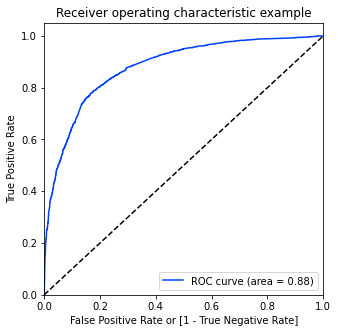

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


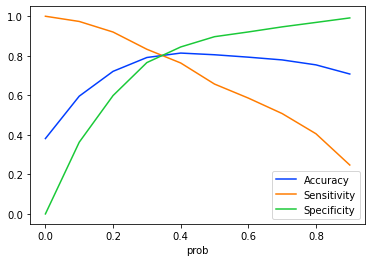

In [91]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.legend(labels=['Accuracy','Sensitivity','Specificity'])

plt.show()

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


In [93]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.final_predicted )
print(confusion_2)

[[3245  757]
 [ 500 1966]]


In [94]:
# Actual/Predicted      not_converted      converted  
# not_converted             3064              938
# converted                  412             2054


In [95]:
Confusion_Matrix_Func(confusion_2)

Accuracy                  = 0.8057
Sensitivity               = 0.7972
Specificity               = 0.8108
False Positive Rate       = 0.1892
Precision                 = 0.722
Recall                    = 0.7972
Negative Predictive Value = 0.8665


In [96]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
preci, recal, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


In [97]:
p_score = round(precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)
r_score = round(recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.722
Recall score    = 0.7972


In [98]:
# Creating precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

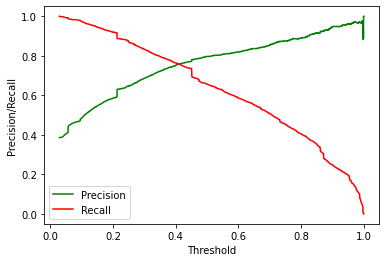

In [99]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [100]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()


In [101]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


<h2> Step- 8: Making predictions on the test set </h2>
<ol style="color:DodgerBlue";>
<li>Scaling Test dataset</li>
<li>Prediction on Test Dataset using final model</li>
<ol>

In [102]:
NumVarCols=X_test.select_dtypes(include=['int64','float64']).columns

X_test[NumVarCols] = scaler.transform(X_test[NumVarCols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


In [103]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

# Making prediction using Logistic Regression Model - 4
y_test_pred = LRMod4.predict(X_test_sm)

# Top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [104]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [105]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [106]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [108]:
# Taking sensitivity-specificity method at 0.35 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


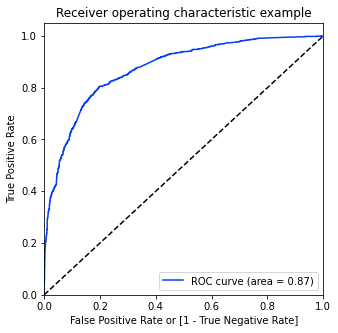

In [109]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<mark>Area under ROC curve is 0.87 out of 1 </mark>which indicates a good predictive model<br>
Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.<br>
We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

In [110]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(confusion_test)



[[1359  318]
 [ 227  868]]


In [111]:
# Actual/Predicted      not_converted      converted  
# not_converted             1359              318
# converted                  227              868


In [112]:
Confusion_Matrix_Func(confusion_test)

Accuracy                  = 0.8034
Sensitivity               = 0.7927
Specificity               = 0.8104
False Positive Rate       = 0.1896
Precision                 = 0.7319
Recall                    = 0.7927
Negative Predictive Value = 0.8569


<h4>Adding Lead Score to Test dataframe</h4>

In [113]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87
5,9186,1,0.503859,1,50
6,1631,1,0.419681,1,42
7,8963,1,0.154531,0,15
8,8007,0,0.072344,0,7
9,5324,1,0.298849,0,30


In [114]:
y_pred_final.sort_values(by='Lead_Score', ascending=False).head(15)


,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1026,5671,1,0.998942,1,100
1239,2489,1,0.996164,1,100
1976,4775,1,0.996645,1,100
196,5793,1,0.996645,1,100
416,2804,1,0.996645,1,100
739,5586,1,0.996645,1,100
745,6383,1,0.998599,1,100
427,446,1,0.996645,1,100
851,8098,1,0.996645,1,100
1091,818,1,0.995741,1,100



<ol>
<li>The customers with a higher lead score have a higher conversion chance</li>
<li>The customers with a lower lead score have a lower conversion chance</li>
</ol>

In [115]:
# features and their coefficicent from final model
parameters=LRMod4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

In [116]:
print("Train Set","\n")
print("------------"*9)
print(Confusion_Matrix_Func(confusion_2),"\n")
print("Test Set","\n")
print("------------"*9)
print(Confusion_Matrix_Func(confusion_test))

Train Set 

------------------------------------------------------------------------------------------------------------
Accuracy                  = 0.8057
Sensitivity               = 0.7972
Specificity               = 0.8108
False Positive Rate       = 0.1892
Precision                 = 0.722
Recall                    = 0.7972
Negative Predictive Value = 0.8665
None 

Test Set 

------------------------------------------------------------------------------------------------------------
Accuracy                  = 0.8034
Sensitivity               = 0.7927
Specificity               = 0.8104
False Positive Rate       = 0.1896
Precision                 = 0.7319
Recall                    = 0.7927
Negative Predictive Value = 0.8569
None


<h3>Conclusion drawn from Train-Test dataset</h3>

<b>Train Data Set:</b>
<ol style="color:DodgerBlue";>
<li>Accuracy: 80.57% </li>
<li>Sensitivity: 79.72% </li>
<li>Specificity: 81.08% </li>
</ol>
<b>Test Data Set:</b>
<ol style="color:DodgerBlue";>
<li>Accuracy: 80.34% </li>
<li>Sensitivity: 79.27% </li>
<li>Specificity: 81.04% </li>
</ol>


Overall, the model is performing well in the test set, what it had learnt from the train set<br>
<mark>The evaluation metrics of the model are consistently close to each other</mark>, indicating that the model is performing consistently across different evaluation metrics in both the test and train datasets.
<h2> Final Conclusion </h2>
<ol>
<li>As our model predicted leads from Lead Source_Welingak Website, Lead Source_Reference, Current_occupation_Working Professional are likely to be converted more, 
so should focus on these leads </li>
<li>Company should focus on leads which our model predicted as 1 and likely focus attention to them 
as they are potential paying customer.</li>
<li>Model predicted last_activity_SMS_sent and Activity_Email_opened are potentials leads and likely to convert.</li>
<li>Tailor made SMS or Emails to potentials leads to lure them and increase chance of conversion</li>
<li>Total Spent on Website indicates that consumer checking out website are likely to convert 
as it implies interest shown by consumer.</li>
<li>Enabling customized Ads or contact information on website will help company to lure consumer 
and increase chance of conversion</li>
<li>Lead Source Olak chat indicates consumers are showing interest and gathering information using chat feature.</li>
</ol>


<h2>Recommendation </h2>
<ol>
<li>Work on website and application of company so customer can navigate and surf easily,
Bad UI interface or badly designed website page are huge turn off for customer</li>
<li>Chatbot to solve minor query of customer on website or app page is added plus</li>
<li>Customized SMS and emails to customer based on their profiles/Bio</li>
<li>Referrals and incentives-based scheme can spread word of mouth about company.</li>
<li>Also Marketing and making consumer aware plays huge part to garner attention of consumer</li>
<li>Reaching out to existing consumer timely and getting their feedbacks should be prioritized</li>
</ol>
